# Training

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('data.xlsx')
df.head()

,CEMENT_RATIO,FINE_AGGREGATE_RATIO,COARSE_AGGREGATE_RATIO,FLY_ASH_RATIO,WC_RATIO,CONCRETE_GRADE,COMPRESSIVE_STRENGTH
0,1,1.58,3.05,0.0,0.53,M25,36.84
1,1,1.43,2.82,0.0,0.50,M30,43.13
2,1,1.54,2.99,0.0,0.53,M30,38.58
3,1,1.28,1.58,0.0,0.47,M35,47.16
4,1,1.39,2.77,0.0,0.49,M35,45.05


In [ ]:
df.columns

Index(['CEMENT_RATIO', 'FINE_AGGREGATE_RATIO', 'COARSE_AGGREGATE_RATIO',
       'FLY_ASH_RATIO', 'WC_RATIO', 'CONCRETE_GRADE', 'COMPRESSIVE_STRENGTH '],
      dtype='object')

In [ ]:
X = df[['CEMENT_RATIO', 'FINE_AGGREGATE_RATIO', 'COARSE_AGGREGATE_RATIO',
       'FLY_ASH_RATIO', 'WC_RATIO', 'CONCRETE_GRADE']]

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)
X

,CEMENT_RATIO,FINE_AGGREGATE_RATIO,COARSE_AGGREGATE_RATIO,FLY_ASH_RATIO,WC_RATIO,CONCRETE_GRADE_M25,CONCRETE_GRADE_M30,CONCRETE_GRADE_M35,CONCRETE_GRADE_M40,CONCRETE_GRADE_M45
0,1,1.58,3.05,0.0,0.53,1,0,0,0,0
1,1,1.43,2.82,0.0,0.50,0,1,0,0,0
2,1,1.54,2.99,0.0,0.53,0,1,0,0,0
3,1,1.28,1.58,0.0,0.47,0,0,1,0,0
4,1,1.39,2.77,0.0,0.49,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
125,1,1.06,2.23,0.0,0.41,0,0,0,0,1
126,1,1.05,1.91,0.0,0.39,0,0,0,0,1
127,1,1.28,2.03,0.0,0.40,0,0,0,0,1
128,1,1.00,1.89,0.0,0.41,0,0,0,0,1


In [ ]:
Y = df['COMPRESSIVE_STRENGTH ']
Y

0      36.84
1      43.13
2      38.58
3      47.16
4      45.05
       ...  
125    54.40
126    55.04
127    54.67
128    54.05
129    49.70
Name: COMPRESSIVE_STRENGTH , Length: 130, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101, shuffle=True)
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 10)
(13, 10)
(117,)
(13,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept
print(model.intercept_)

37.85778658143859


In [ ]:
predictions = model.predict(X_test)
predictions

array([50.03425497, 40.58261732, 30.037811  , 33.9635424 , 54.46004199,
       34.75857572, 45.65578286, 45.67923019, 33.06642921, 40.38589534,
       45.41382754, 40.82200633, 51.02136942])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


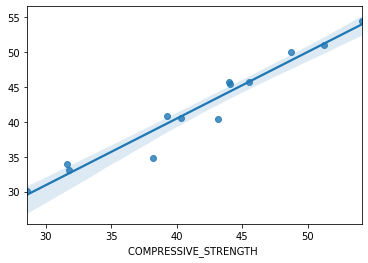

In [ ]:
sns.regplot(y_test,predictions)

In [ ]:
model.score(X_test, y_test) * 100

94.73455293011999

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
grades = list(df['CONCRETE_GRADE'].unique())
grades

['M25', 'M30', 'M35', 'M40', 'M45', 'M20']

In [ ]:
grade = df['CONCRETE_GRADE']
grade = pd.get_dummies(data=grade, drop_first=True)
grade

,M25,M30,M35,M40,M45
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
125,0,0,0,0,1
126,0,0,0,0,1
127,0,0,0,0,1
128,0,0,0,0,1


In [ ]:
values = grade.drop_duplicates(ignore_index=True)
values

,M25,M30,M35,M40,M45
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
5,0,0,0,0,0


In [ ]:
grade_dict = dict()
for i in range(len(grades)):
  grade_dict[grades[i]] = list(values.iloc[i])
grade_dict

{'M20': [0, 0, 0, 0, 0],
 'M25': [1, 0, 0, 0, 0],
 'M30': [0, 1, 0, 0, 0],
 'M35': [0, 0, 1, 0, 0],
 'M40': [0, 0, 0, 1, 0],
 'M45': [0, 0, 0, 0, 1]}

# Implementation

In [ ]:
import pandas as pd
import numpy as np
import pickle
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
concreteGrades = {
    'M20': [0, 0, 0, 0, 0],
 'M25': [1, 0, 0, 0, 0],
 'M30': [0, 1, 0, 0, 0],
 'M35': [0, 0, 1, 0, 0],
 'M40': [0, 0, 0, 1, 0],
 'M45': [0, 0, 0, 0, 1]
 }
 
wcRatioRanges = {
    'M20': (0.55, 0.75),
    'M25': (0.5, 0.7),
    'M30': (0.45, 0.65),
    'M35': (0.4, 0.6),
    'M40': (0.35, 0.55),
    'M45': (0.3, 0.5),
 }
 
import urllib.request
urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=13MWkqzwYn39jdHVhhSOgZcbF7LxYkSju', 'model.pkl')
 
#importing the trained model
model = pickle.load(open('model.pkl', 'rb'))
 
 
#input for mix proportion
 
flag = True #a value only for maintaining the loop
 
while(flag):
  mixProportion = list(map(float, input("Enter the Mix Proportion: ").split(":"))) 
  if len(mixProportion) == 3:
    mixProportion.append(0)
    flag = False
  elif len(mixProportion) == 4:
    flag = False
  else:
    print('Please enter a valid Mix Proportion')
    del mixProportion
 
  
#input for concrete grade
 
flag = True #a value only for maintaining the loop
 
while(flag):
  concreteGrade = input("Enter the Concrete Grade: ")
  if concreteGrade not in concreteGrades.keys():
    print("Please enter a valid Concrete Grade between M20 and M55")
    del concreteGrade
  else:
    flag = False
 
 
#input for W/C ratio and checking whether it is in the range depending upon the concrete grade
 
flag = True #a value only for maintaining the loop
 
while(flag):
  wcRatio = float(input("Enter the W/C Ratio (value should be between {} and {}): ".format(wcRatioRanges[concreteGrade][0], wcRatioRanges[concreteGrade][1])))
  if (wcRatioRanges[concreteGrade][0] <= wcRatio <= wcRatioRanges[concreteGrade][1]):
    flag = False
  else:
    print("Please enter a value in the specified range")
    del wcRatio
 
 
#setting up values for feeding to the model for prediction
val = mixProportion
val.append(wcRatio)
val.extend(concreteGrades[concreteGrade])
val = np.array(val).reshape(1, -1)
 
#predicting the value
concreteStrength = model.predict(val)
 
concreteStrength = float(np.round(concreteStrength, 2))
print('Concrete Strength: {}MPa'.format(concreteStrength))
 
 
 
# Stress vs Strain Graph
 
 
epsilons = [0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003]
epsilon_0 = 0.002
c = 0.8
f_ = int(concreteGrade[1:])
 
x = epsilons
y = list()
 
for epsilon in epsilons:
  fraction = epsilon / epsilon_0
  fc = (f_ * c) * ((2 * fraction) - (fraction ** 2))
  y.append(fc)
 
 
x_y = make_interp_spline(x,y)
X_ = np.linspace(min(x), max(x), 500)
Y_ = x_y(X_)
 
plt.figure(figsize=(12,9))
plt.plot(X_,Y_, linewidth=3)
plt.title('Stress vs Strain Graph ({})'.format(concreteGrade), weight='bold', fontsize=20)
plt.xlabel("Strain", fontsize=15)
plt.ylabel("Stress (MPa)", fontsize=15)
 
 
#scaling the graph
scale_factor = 1.25
 
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
 
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
 
#representing points as dots
plt.scatter(x,y, marker='o', linewidths=5)
plt.grid()
 
#showing point coordinates
for i_x, i_y in zip(x,y):
  plt.text(i_x, i_y, '({},{})'.format(i_x, i_y), ha='left')
    
plt.show()